## Observations and Insights 

1] Scatter plot shows, heavier the mouse, the less effective the drug is.

2] Box plot shows, Capomulin seems to be comparable to Ramicane but it is more effective than Infubinol and Ceftamine

3] The number of measurements were higher for both Capomulin and Ramicane as compared to others. So, it looks like, the actual comparison happened to be only between Capomulin and Ramicane

4] Except Capomulin and Ramicane, in all other treatments tumor volume seems to be increasing rather than getting reduced

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# get the rows from Mouse_metadata file
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# get the rows from Study_results file
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
obervation_df = pd.merge(mouse_metadata, study_results, how='inner', on='Mouse ID')

# Display the data table for preview
obervation_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
mice_count = obervation_df["Mouse ID"].count()
mice_count_df = pd.DataFrame({"Mouse Count": [mice_count]})
mice_count_df

,Mouse Count
0,1893


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
dups = obervation_df[obervation_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep = 'first')]
dups


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
revised_df = obervation_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep = 'first')
revised_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
revised_mice_count = revised_df["Mouse ID"].count()
revised_mice_count_df = pd.DataFrame({"Revised Mouse Count": [revised_mice_count]})
revised_mice_count_df

,Revised Mouse Count
0,1888


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Using the aggregation method, produce the same summary statistics in a single line
# Assemble the resulting series into a single summary dataframe.

summary_grp = revised_df.groupby('Drug Regimen').agg(
    Mean=('Tumor Volume (mm3)', "mean"),
    Median=('Tumor Volume (mm3)', "median"),
    Variance=('Tumor Volume (mm3)', "var"),
    Std_Deviation=('Tumor Volume (mm3)', "std"),
    Std_Error=('Tumor Volume (mm3)', "sem")
)

# Create a summary df
summary_df = pd.DataFrame(summary_grp)

summary_df


,Mean,Median,Variance,Std_Deviation,Std_Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
# total number of measurements taken on each drug regimen using pandas.
mouse_cnt_grp = revised_df.groupby('Drug Regimen').agg(Number_of_Measurements=('Mouse ID', "count"))

# Create a df
mouse_cnt_df = pd.DataFrame(mouse_cnt_grp)

# rename the columns to replace _ with space
mouse_cnt_df.rename(columns={"Number_of_Measurements":"Number of Measurements"}, inplace=True)
mouse_cnt_df

,Number of Measurements
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


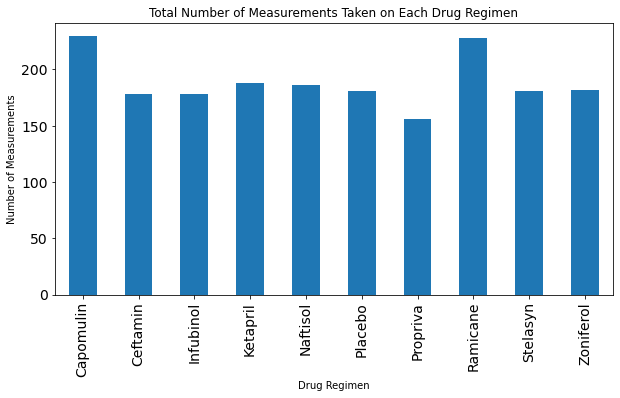

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mouse_cnt_df.plot(kind='bar', figsize=(10,5), fontsize=14, legend=False)

#set chart title and labels
plt.title("Total Number of Measurements Taken on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

plt.show()

In [12]:
# get the index values
drug_list= mouse_cnt_df.index.values
drug_list

# set x-axis based on index values
x_axis = np.arange(len(drug_list))
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

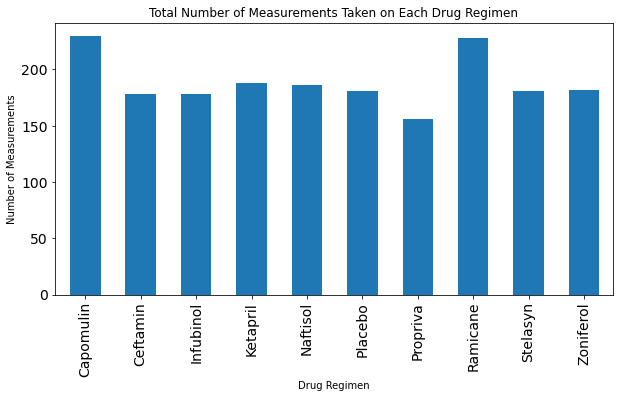

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.figure(figsize=(10,5))

plt.bar(x_axis,mouse_cnt_df['Number of Measurements'], width=0.55)

tick_index = [value for value in x_axis]
plt.xticks(tick_index, drug_list, rotation = 'vertical', fontsize=14)
plt.yticks(fontsize=14)

plt.title("Total Number of Measurements Taken on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

plt.xlim(-0.55, len(x_axis)-0.48)

plt.show()

In [14]:
# get the unique no of mouse id's per sex
sex_group = revised_df.groupby('Sex').agg(Unique_Mouse_Count=('Mouse ID', 'nunique'))

# Create a df
sex_group_df = pd.DataFrame(sex_group)

# Get the unique list of mouse id's irrespective of sex
Total_Mouse_Count = len(revised_df['Mouse ID'].unique())

# find out sex percentage by using Unique_Mouse_Count and Tot_Mouse_Count
Sex_Percentage = (sex_group_df['Unique_Mouse_Count']/Total_Mouse_Count)*100
sex_group_df["Sex Percentage"] = Sex_Percentage

# rename the columns to replace _ with space
sex_group_df.rename(columns={"Unique_Mouse_Count":"Unique Mouse Count"}, inplace=True)

sex_group_df


,Unique Mouse Count,Sex Percentage
Sex,,
Female,124,49.799197
Male,125,50.200803


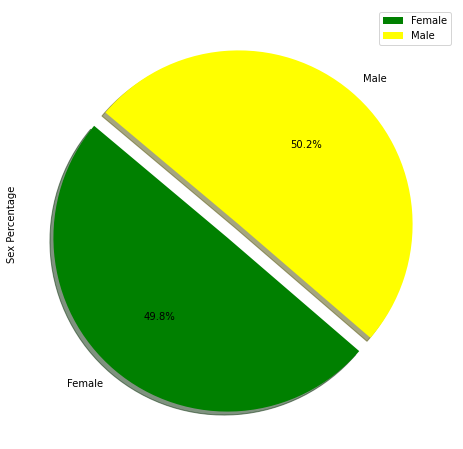

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['green', 'yellow']
explode = (0.1, 0)
sex_group_df.plot(kind='pie', y="Sex Percentage", figsize=(8,8), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")
plt.show()


In [16]:
# get the index values
sex_group_list= sex_group_df.index.values
sex_group_list

array(['Female', 'Male'], dtype=object)

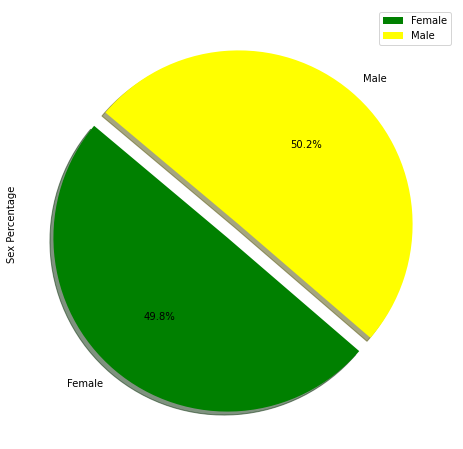

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Set colors for each section of the pie
colors = ['green', 'yellow']

explode = (0.1, 0)

#Create the pie chart based upon the df values 
plt.figure(figsize=(8,8))
plt.pie(sex_group_df["Sex Percentage"], explode=explode, labels=sex_group_list, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.ylabel("Sex Percentage")

plt.legend()
plt.show()


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# NOTE: DO NOT TOUCH "revised_df", it's a main df

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_grp = revised_df.groupby('Mouse ID').agg(Max_Timepoint=('Timepoint', "max"))


# Create a df
max_timepoint_df = pd.DataFrame(max_timepoint_grp)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
quartile_df = pd.merge(revised_df, max_timepoint_df, how='inner', on='Mouse ID')
quartile_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max_Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [19]:
# Put treatments into a list for for loop (and later for plot labels)

# create drug list so that for loop can traverse through it
drugs_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# create empty list to hold 
drug_values = []

# create for loop so that we can traverse through drugs_list
for drug in drugs_list:
    
    qtemp_df = quartile_df.loc[quartile_df['Drug Regimen'] == drug]

    final_quartile_df = qtemp_df.loc[qtemp_df['Timepoint'] == qtemp_df['Max_Timepoint']]
    
    values = final_quartile_df['Tumor Volume (mm3)']
    
    # fill empty list with tumor vol data (for plotting)
    drug_values.append(values)
    
    # Calculate the interquartile range (IQR) for each drug
    quartiles = values.quantile([.25,.5,.75])
    
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f' The IQR for final tumor volume of {drug} is: {iqr}')

    # Find out the upper and lower bounds to help identify outliers for each drug
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # outliers
    outliers = values.loc[(final_quartile_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_quartile_df['Tumor Volume (mm3)'] <= lower_bound)]
    
    outliers_cnt = outliers.count()
    print(f'Number of outliers for {drug} : {outliers_cnt}')
    
    print(" ")
    

 The IQR for final tumor volume of Capomulin is: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of outliers for Capomulin : 0
 
 The IQR for final tumor volume of Ramicane is: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of outliers for Ramicane : 0
 
 The IQR for final tumor volume of Infubinol is: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of outliers for Infubinol : 1
 
 The IQR for final tumor volume of Ceftamin is: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of outliers for Ceftamin : 0
 


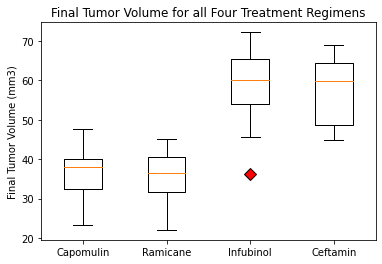

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Box plot required input drug values in list, please ue "drug_values" created in earlier cell
fig1, ax1 = plt.subplots()

# use below to highlight outlier
highlight_outlier = dict(markerfacecolor='r', marker='D', markersize=8)

# plot the box plot
plt.boxplot(drug_values, flierprops=highlight_outlier)

# Add title and labels to boxplot
plt.title('Final Tumor Volume for all Four Treatment Regimens')
plt.ylabel('Final Tumor Volume (mm3)')

# convert values into drugs names, please ue "drugs_list" created in earlier cell
plt.xticks([1, 2, 3, 4], drugs_list)

plt.show()


## Line and Scatter Plots

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Identify data points of a mouse treated with Capomulin

# select any single mouse who was treated with Capomulin irrespective of sex
mouse = revised_df.loc[revised_df['Mouse ID'] == 'b128']
mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


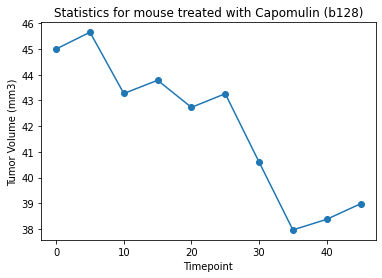

In [22]:
# line plot
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

# Add labels and title to plot
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Statistics for mouse treated with Capomulin (b128)")

# Display plot
plt.show()

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# get all the data related to Capomulin drug into df
capomulin_df = revised_df.loc[revised_df['Drug Regimen'] == 'Capomulin']
capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [24]:
# get the average tumor volume of each mouse falling under Capomulin drug treatement
avg_tumor_vol_grp = capomulin_df.groupby(['Mouse ID', 'Weight (g)']).agg(Average_Tumor_Volumne=('Tumor Volume (mm3)', "mean"))

# Create a df
scatter_df = pd.DataFrame(avg_tumor_vol_grp)

# drop the 'Mouse ID' index field
scatter_revised_df = scatter_df.droplevel('Mouse ID')


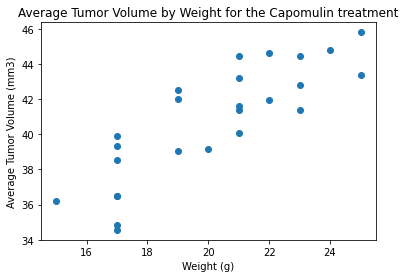

In [25]:
# scatter plot
x = scatter_revised_df.index
y = scatter_revised_df['Average_Tumor_Volumne']

plt.scatter(x, y)

# Add labels and title
plt.title('Average Tumor Volume by Weight for the Capomulin treatment')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

In [26]:
# Calculate the correlation coefficient
# for mouse weight and average tumor volume for the Capomulin regimen


# Calculate the correlation coefficient between mouse weight and average tumor volume for the Capomulin treatment
# NOTE: we already got x (Weight (g)) and y (Average_Tumor_Volumne) values from scatter plot activity
correlation = st.pearsonr(x,y)

print(f"The correlation between weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}.")


The correlation between weight and average tumor volume for the Capomulin regimen is 0.84.


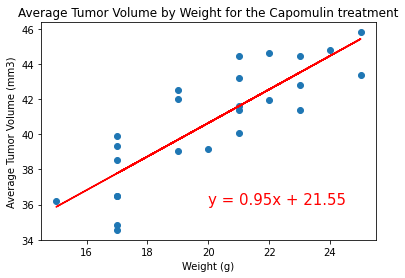

In [27]:
# Calculate the linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

plt.annotate(line_eq,(20,36),fontsize=15,color="red")

plt.title('Average Tumor Volume by Weight for the Capomulin treatment')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()